# Линейная регрессия

Студент: Белянинов Илья Витальевич\
Группа: ПМ22-1

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [288]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv')

In [289]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [290]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [291]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

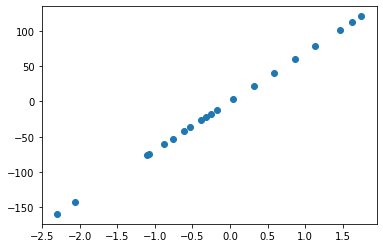

In [245]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [246]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [247]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


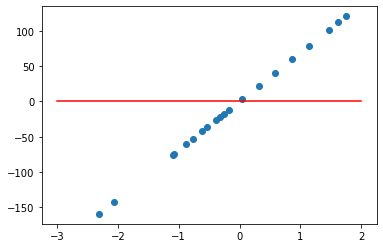

In [303]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [249]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


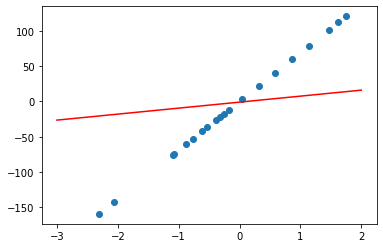

In [250]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [251]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * np.array(X)
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for s in range(1, max_steps+1):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1          
            steps.append(s)
            errors.append(hyp.error(X, Y))
        return steps, errors

In [252]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.03937321303112907


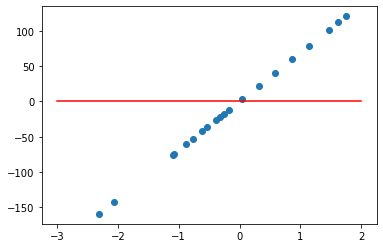

In [294]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

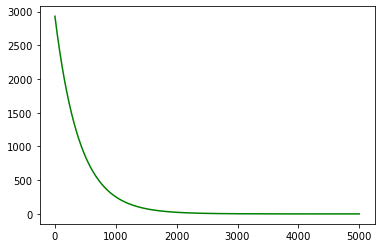

In [228]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## Задания для самостоятельного выполнения

### 1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [254]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
        
    def predict(self, X):
        return self.b0 + self.b1 * np.array(X)
    
    def error(self, X, Y):
        return float(np.sum(((self.predict(X) - Y)**2) / (2 * len(X))))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []       
        for s in range(1, max_steps+1):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1          
            steps.append(s)
            errors.append(self.error(X, Y))
        return steps, errors

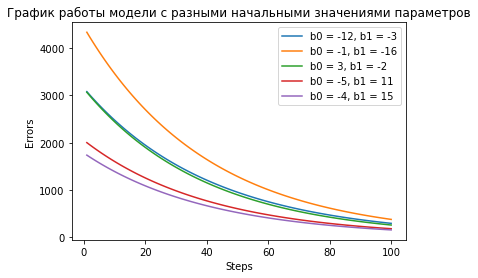

In [255]:
import random

for _ in range(5):
    b0 = random.randint(-20,20)
    b1 = random.randint(-20,20)
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y, alpha = 0.01, max_steps = 100)
    plt.plot(steps, errors, label = f'b0 = {b0}, b1 = {b1}')

plt.title('График работы модели с разными начальными значениями параметров')
plt.xlabel('Steps')
plt.ylabel('Errors')
plt.legend()
plt.show()

## 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

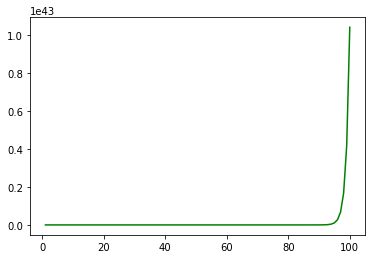

In [256]:
hyp = Model()
plt.figure()
steps, errors = hyp.fit(x, y, alpha=2, max_steps=100)
plt.plot(steps, errors, 'g')
plt.show()

### 3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [257]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214
5,-0.611756
6,0.319039
7,-0.761207
8,0.582815
9,-1.099891


In [264]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
        
    def predict(self, X):
        return self.b0 + self.b1 * np.array(X)

    def error(self, X, Y):
        return float(np.sum(((self.predict(X) - Y)**2) / (2 * len(X))))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []       
        for s in range(1, max_steps+1):
            dJ0 = np.sum(self.predict(X) - Y) /len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1          
            steps.append(s)
            errors.append(self.error(X, Y))
        return steps, errors

In [265]:
x['0'] = x['0'].astype(float)
y['0'] = y['0'].astype(float)

In [266]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.039373213031129055


### 4. Модифицируйте алгоритм градиентного спуcка таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [268]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
        
    def predict(self, X):
        return self.b0 + self.b1 * np.array(X)
    
    def error(self, X, Y):
        return float(np.sum(((self.predict(X) - Y)**2) / (2 * len(X))))
    
    def fit(self, X, Y, alpha=0.001, accuracy=10**(-6), max_steps=5000):
        steps, errors = [], []       
        for s in range(1, max_steps+1):
            dJ0 = np.sum(self.predict(X) - Y) /len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1          
            steps.append(s)
            try:
                if float(errors[-1] - self.error(X, Y)) < accuracy:
                    return steps, errors
            except:
                pass
            errors.append(self.error(X, Y))
        return steps, errors

In [269]:
hyp = Model()
errors = hyp.fit(x, y, accuracy=1, max_steps=1000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 410.8021056020668


In [270]:
hyp = Model()
errors = hyp.fit(x, y, accuracy=0.1, max_steps=1000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 253.13429386398101


### 5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [293]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
        
    def predict(self, X):
        return self.b0 + self.b1 * np.array(X)
    
    def error(self, X, Y):
        return float(np.sum(((self.predict(X) - Y)**2) / (2 * len(X))))
    
    def fit(self, X, Y, alpha=0.001, accuracy=10**(-6), max_steps=5000):
        steps, errors = [], []       
        for s in range(1, max_steps+1):
            dJ0 = np.sum(self.predict(X) - Y) /len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1          
            steps.append(s)
            try:
                if float(errors[-1] - self.error(X, Y)) < accuracy:
                    print(f'Ошибка перестает существенно меняться. Кол-во шагов {s}')
                    return steps, errors
            except:
                pass
            errors.append(self.error(X, Y))
        print(f'Достигнуто максимальное кол-во шагов - {s}')
        return steps, errors

In [272]:
hyp = Model()
steps, errors = hyp.fit(x, y, max_steps=10000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

Ошибка перестает существенно меняться. Кол-во шагов 7227
error after gradient descent: 0.0005244076717215662


In [273]:
hyp = Model()
steps, errors = hyp.fit(x, y, max_steps=100)
J = hyp.error(x, y)
print("error after gradient descent:", J)

Достигнуто максимальное кол-во шагов - 100
error after gradient descent: 2291.882685525399


### 6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [274]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
        
    def predict(self, X):
        return self.b0 + self.b1 * np.array(X)
    
    def error(self, X, Y):
        return float(np.sum(((self.predict(X) - Y)**2) / (2 * len(X))))
    
    def fit(self, X, Y, alpha=0.999, accuracy=10**(-6), max_steps=5000):
        while True:
            try:
                print('Alpha', alpha)
                steps, errors = [], []       
                for s in range(1, max_steps+1):
                    dJ0 = np.sum(self.predict(X) - Y) /len(X)
                    dJ1 = np.sum((self.predict(X) - Y) * X) /len(X)
                    self.b0 -= alpha * dJ0
                    self.b1 -= alpha * dJ1          
                    steps.append(s)
                    if len(errors)!= 0:
                        if errors[-1] < self.error(X, Y):
                            alpha /= 2
                            p
                    errors.append(self.error(X, Y))
                return steps, errors
            except:
                pass

In [275]:
hyp = Model()
steps, errors = hyp.fit(x, y, max_steps=1000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

Alpha 0.999
Alpha 0.4995
Alpha 0.24975
Alpha 0.124875
Alpha 0.0624375
Alpha 0.03121875
Alpha 0.015609375
Alpha 0.0078046875
Alpha 0.00390234375
Alpha 0.001951171875
Alpha 0.0009755859375
Alpha 0.00048779296875
Alpha 0.000243896484375
Alpha 0.0001219482421875
Alpha 6.097412109375e-05
Alpha 3.0487060546875e-05
Alpha 1.52435302734375e-05
Alpha 7.62176513671875e-06
Alpha 3.810882568359375e-06
Alpha 1.9054412841796875e-06
Alpha 9.527206420898437e-07
Alpha 4.763603210449219e-07
Alpha 2.3818016052246094e-07
Alpha 1.1909008026123047e-07
Alpha 5.9545040130615234e-08
Alpha 2.9772520065307617e-08
Alpha 1.4886260032653809e-08
Alpha 7.443130016326904e-09
Alpha 3.721565008163452e-09
Alpha 1.860782504081726e-09
Alpha 9.30391252040863e-10
Alpha 4.651956260204315e-10
Alpha 2.3259781301021576e-10
Alpha 1.1629890650510788e-10
Alpha 5.814945325255394e-11
Alpha 2.907472662627697e-11
Alpha 1.4537363313138485e-11
Alpha 7.2686816565692425e-12
Alpha 3.6343408282846212e-12
Alpha 1.8171704141423106e-12
Alpha 9.0

### 7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [301]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
        
    def predict(self, X):
        return self.b0 + self.b1 * np.array(X)
    
    def error(self, X, Y):
        return float(np.sum(((self.predict(X) - Y)**2) / (2 * len(X))))
    
    def fit(self, X, Y, alpha=0.999, accuracy=10**(-6), max_steps=5000):
        while True:
            try:
                print('Alpha', alpha)
                steps, errors = [], []       
                for s in range(1, max_steps+1):
                    dJ0 = np.sum(self.predict(X) - Y) /len(X)
                    dJ1 = np.sum((self.predict(X) - Y) * X) /len(X)
                    self.b0 -= alpha * dJ0
                    self.b1 -= alpha * dJ1          
                    steps.append(s)
                    if len(errors)!= 0:
                        if errors[-1] < self.error(X, Y):
                            alpha /= 2
                            p
                    errors.append(self.error(X, Y))
                return steps, errors
            except:
                pass

    def plot(self, X, Y, title="График линейной регрессии"):
        plt.figure(figsize=(8, 6))
        plt.scatter(X, Y, color='b')
        plt.plot(np.array(X), np.array(self.predict(X)), color='r')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title(title)
        plt.show()

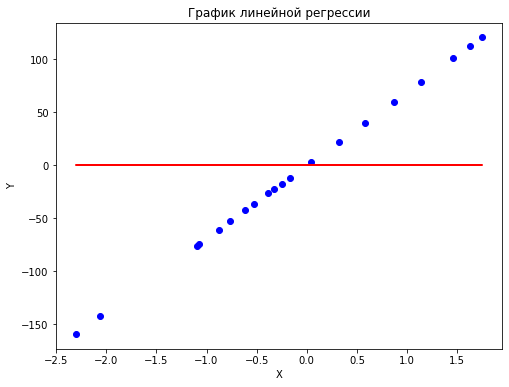

In [302]:
hyp = Model()
hyp.plot(x, y)